In [1]:
#install library
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv("application_train.csv", sep=',')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_train.shape

(307511, 122)

**from application_train.csv:**
1. This dataset contains 307,511 rows and 122 columns.
2. Each row is identified by a unique 'SK_ID_CURR,' and the outcome label is found within the 'TARGET' column.
3. The 'TARGET' column serves as an indicator where 0: loan was repaid, and 1: loan was not repaid.

#### EDA & Visualization

In [5]:
df_train_copy = df_train.copy()
desc = {0: "Client with Loan Repayed", 1: "Client with Loan Not Repayed"}
df_train_copy['TARGET'] = df_train_copy['TARGET'].map(desc)
target_desc = df_train_copy['TARGET'].value_counts().reset_index()
target_desc.columns = ['TARGET', 'COUNT']
target_desc = target_desc.sort_values(by='COUNT', ascending=False)
target_desc.style.background_gradient(cmap='magma')

,TARGET,COUNT
0,Client with Loan Repayed,282686
1,Client with Loan Not Repayed,24825


In [6]:
target_desc_perc = (df_train_copy['TARGET'].value_counts()/len(df_train_copy))*100
target_desc_perc.reset_index().style.background_gradient(cmap='magma')

,TARGET,count
0,Client with Loan Repayed,91.927118
1,Client with Loan Not Repayed,8.072882


Text(0, 0.5, 'Total of Clients')

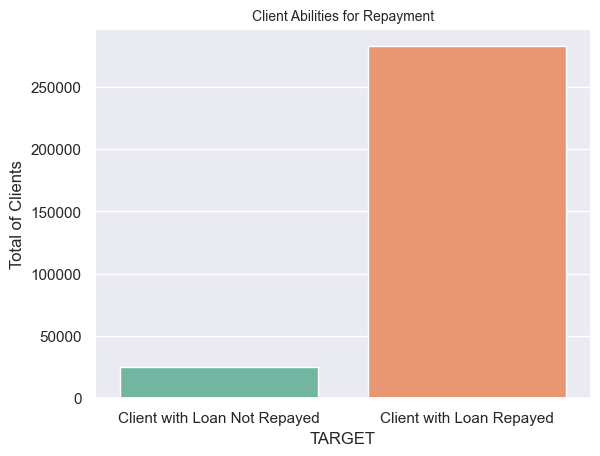

In [42]:
def prcntg(axx):
    all_heights = [[p.get_height() for p in bars] for bars in axx.containers]
    for bars in axx.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            axx.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')
            
sns.set(style="darkgrid")
ax = sns.countplot(x="TARGET", data=df_train_copy, palette="Set2")
ax.set_title('Client Abilities for Repayment', fontdict={'size': 10})
plt.ylabel('Total of Clients')

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='Total of Clients'>

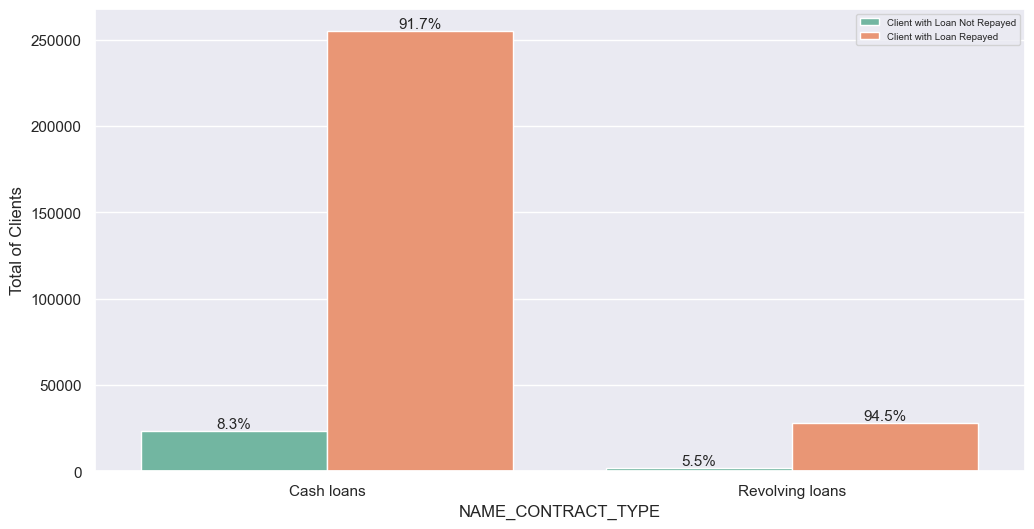

In [41]:
#Total Clients (by Contract Type)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='NAME_CONTRACT_TYPE', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
prcntg(ax)
ax

<Axes: xlabel='CODE_GENDER', ylabel='Total of Clients'>

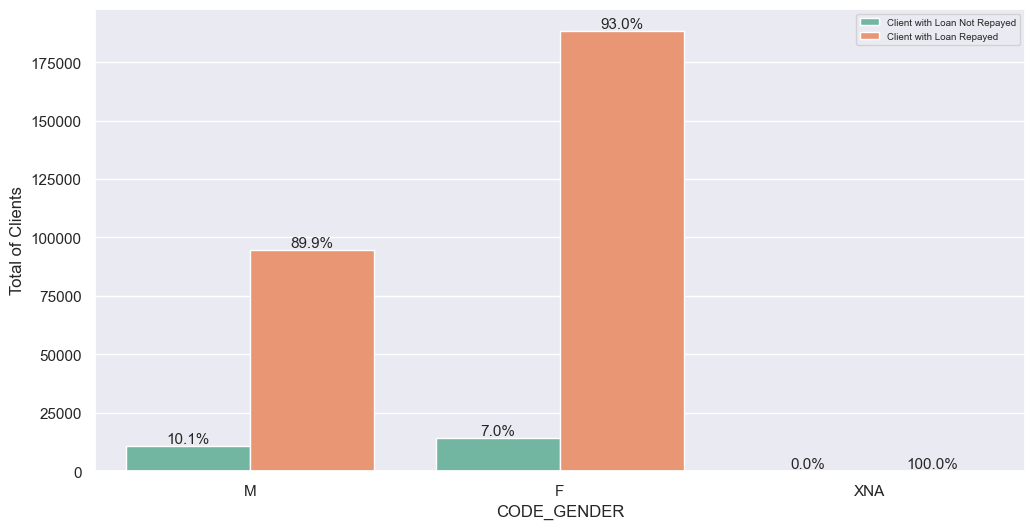

In [44]:
#Total Clients (by Gender)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='CODE_GENDER', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
prcntg(ax)
ax

<Axes: xlabel='FLAG_OWN_CAR', ylabel='Total of Clients'>

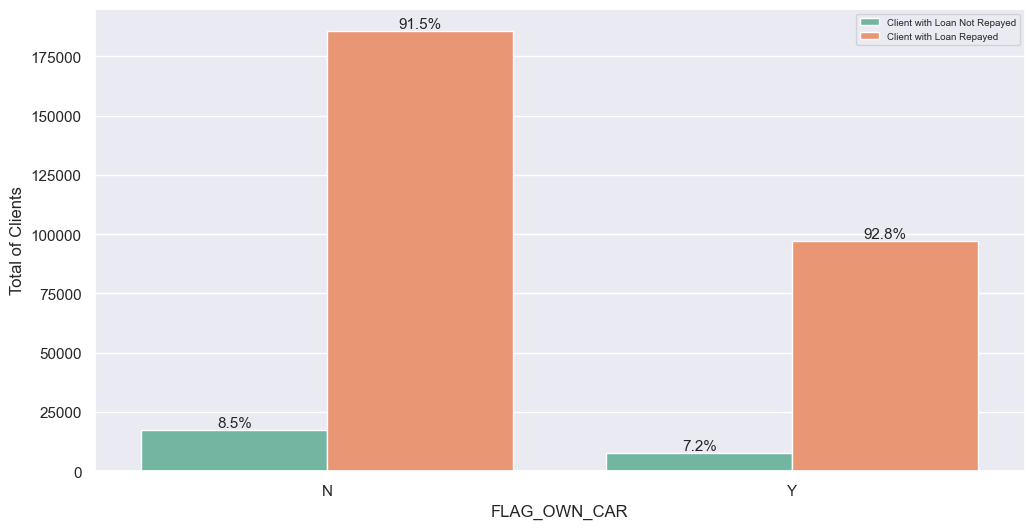

In [45]:
#Total Clients (by Flag Own Car)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='FLAG_OWN_CAR', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
prcntg(ax)
ax

<Axes: xlabel='FLAG_OWN_REALTY', ylabel='Total of Clients'>

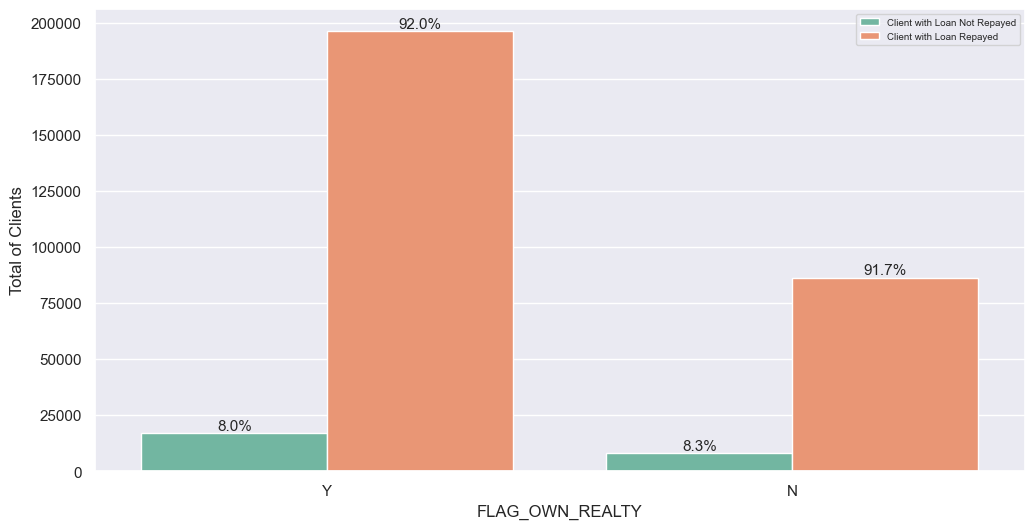

In [46]:
#Total Clients (by Flag Own Realty)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='FLAG_OWN_REALTY', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
prcntg(ax)
ax

<Axes: xlabel='NAME_FAMILY_STATUS', ylabel='Total of Clients'>

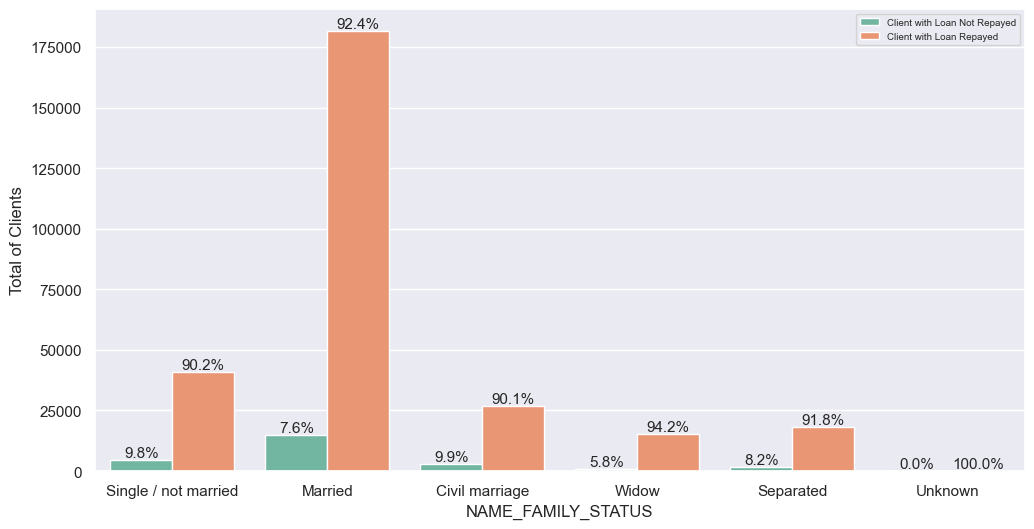

In [43]:
#Total Clients (by Family Status)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='NAME_FAMILY_STATUS', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
prcntg(ax)
ax

<Axes: xlabel='CNT_CHILDREN', ylabel='Total of Clients'>

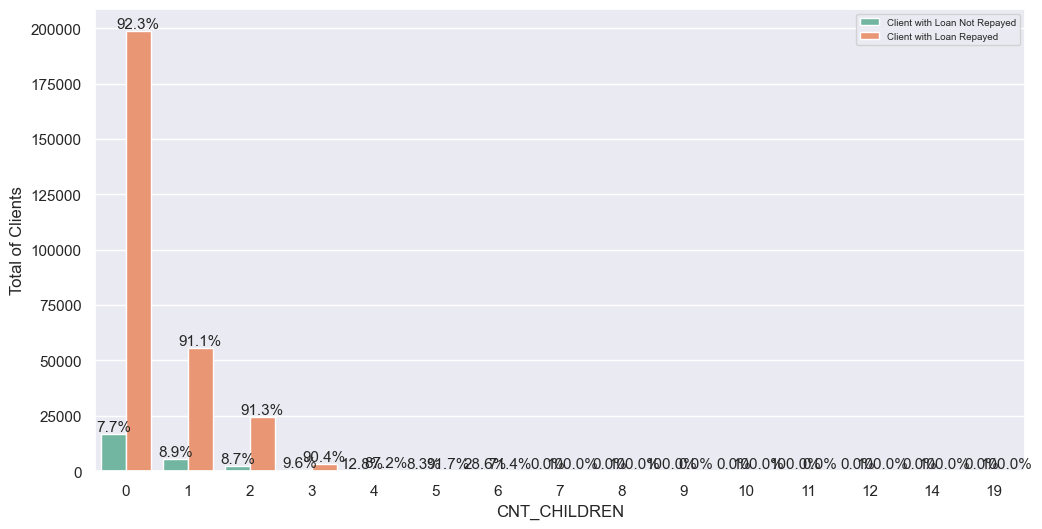

In [47]:
#Total Clients (by Number of Children)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='CNT_CHILDREN', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
prcntg(ax)
ax

<Axes: xlabel='NAME_INCOME_TYPE', ylabel='Total of Clients'>

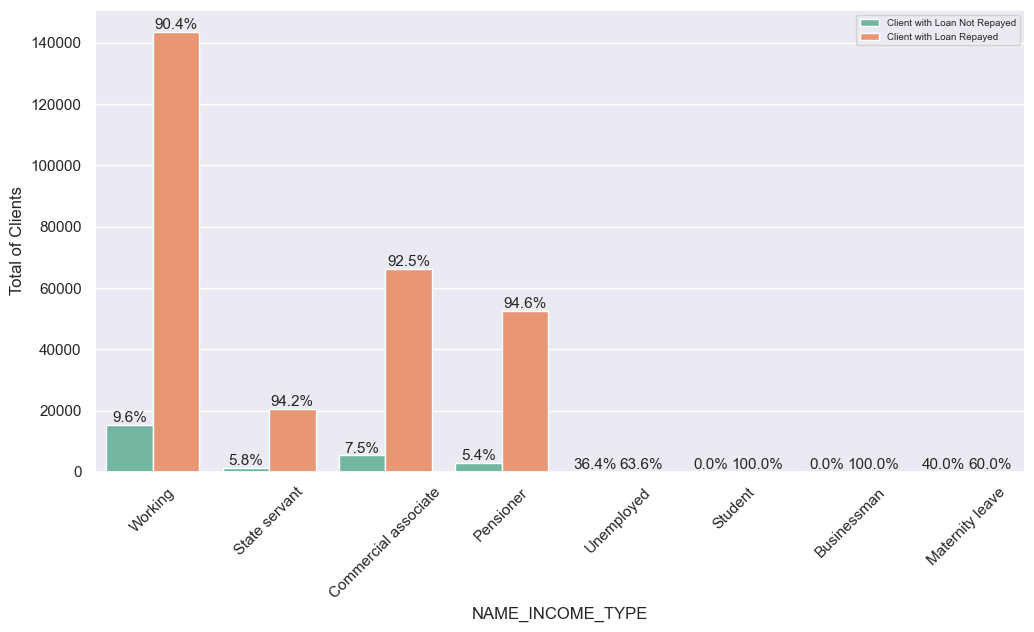

In [48]:
#Total Clients (by Income Type)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='NAME_INCOME_TYPE', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.xticks(rotation=45)
plt.legend(fontsize = "7")
prcntg(ax)
ax

<Axes: xlabel='OCCUPATION_TYPE', ylabel='Total of Clients'>

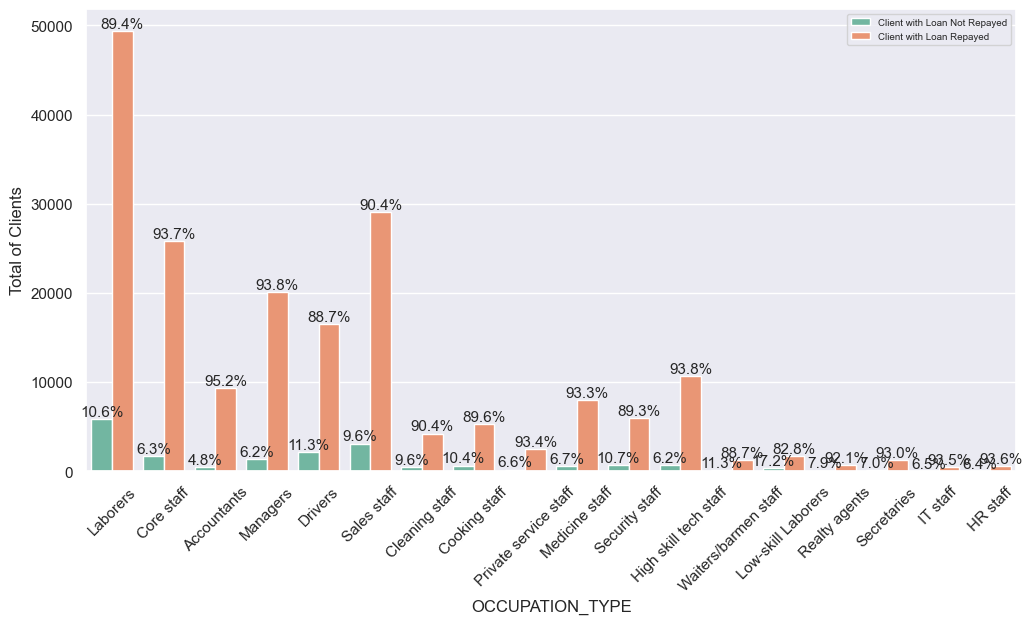

In [49]:
#Total Clients (by Occupation Type)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='OCCUPATION_TYPE', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
plt.xticks(rotation=45)
prcntg(ax)
ax

<Axes: xlabel='ORGANIZATION_TYPE', ylabel='Total of Clients'>

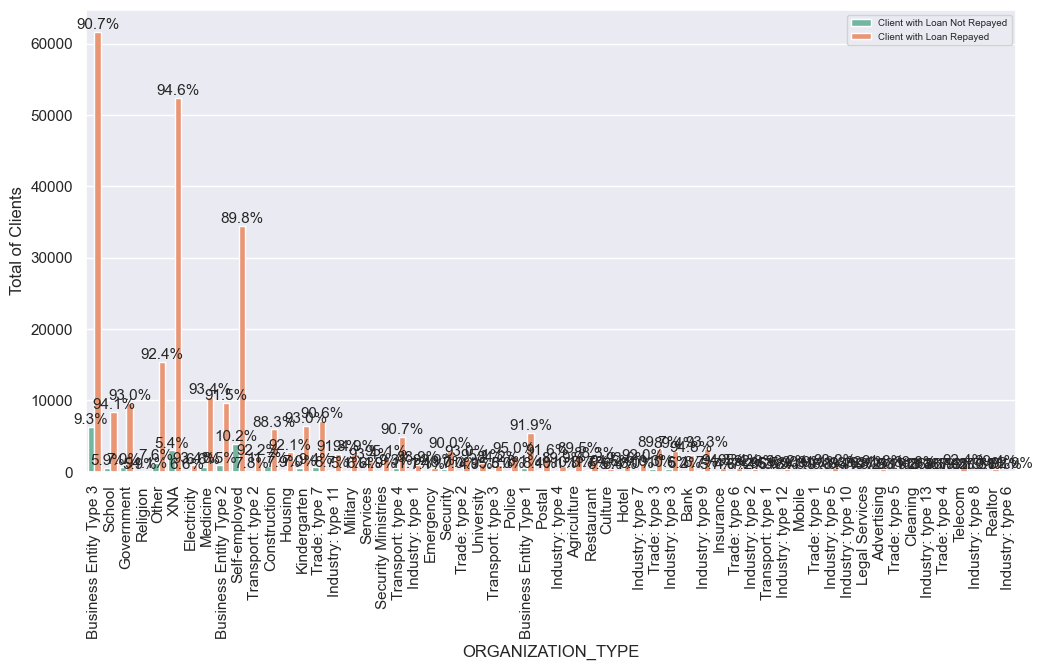

In [50]:
#Total Clients (by Organization Type)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='ORGANIZATION_TYPE', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
plt.xticks(rotation=90)
prcntg(ax)
ax

<Axes: xlabel='NAME_EDUCATION_TYPE', ylabel='Total of Clients'>

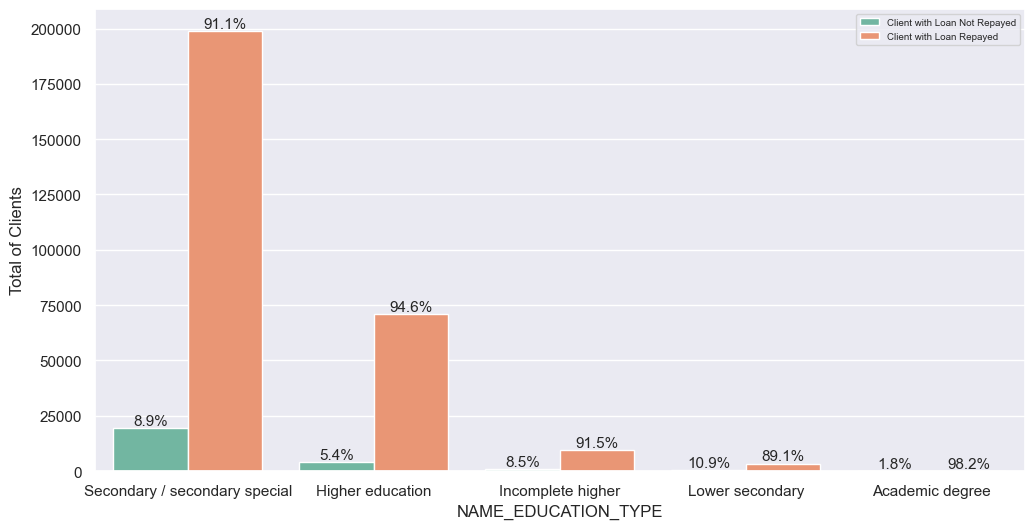

In [51]:
#Total Clients (by Education Type)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='NAME_EDUCATION_TYPE', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
prcntg(ax)
ax

<Axes: xlabel='NAME_HOUSING_TYPE', ylabel='Total of Clients'>

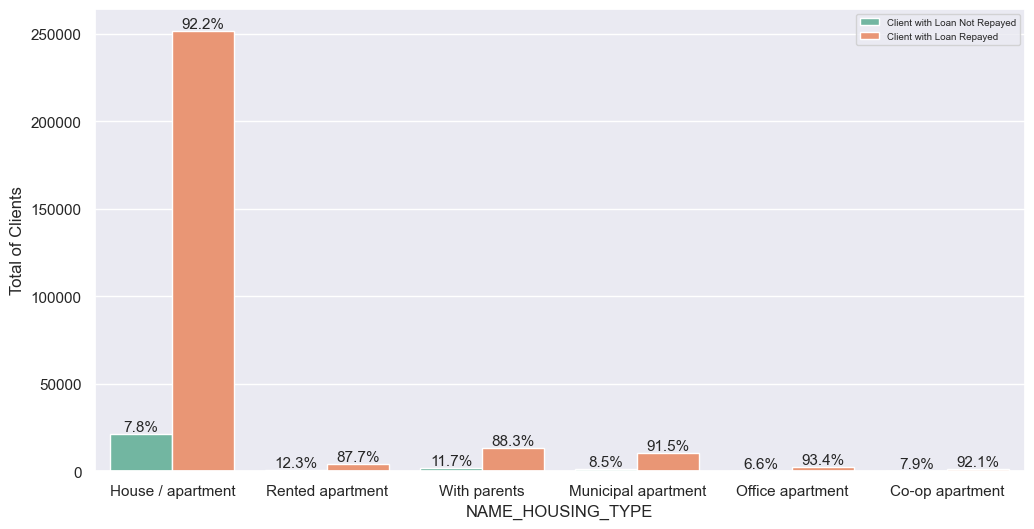

In [52]:
#Total Clients (by Housing Type)
fig = plt.subplots(figsize=(12,6))
ax = sns.countplot(x='NAME_HOUSING_TYPE', data = df_train_copy, hue = 'TARGET', palette = 'Set2')
plt.ylabel('Total of Clients')
plt.legend(fontsize = "7")
prcntg(ax)
ax

**EDA & Visualization Results**
1. Around 24K clients (9% of the total 307K clients) experienced difficulty repaying their loans.
2. More clients apply for cash loans (around 278K) than revolving loans (around 29K). Around 9% of clients had difficulty paying cash loans, and around 6% of clients had difficulty paying revolving loans.
4. Women apply for loans more than men. There were around 202K loans application applied by women, and 105K loans application applied by men. However, men are more have difficulty paying loans (around 10%) compared to women (around 7%).
5. Most of clients don't own a car. Clients who own cars (around 8%) have problems paying loans compared to clients who do not own cars (around 7%).
6. Most of clients own real estate. Clients who own real estate (around 8%) have problems paying loans compared to clients who do not own real estate (around 7%).
7. Most of clients are married, followed by Single/not married. Civil marriage have the highest percentage of having problems paying loans (around 10%).
8. Most of the clients have no children, followed by have 1 children. 100% of clients who have 9 and 11 children have problems paying loans.
9. Most of the clients have 2 family members, followed by 1 (single persons). 100% of clients with family size of 11 and 13 have problems paying loans.
10. Most of the client's income comes from Working, followed by Commercial associate. Clients with income from maternity leaves and those who are unemployed have the largest percentage (around 40% and 36%) having problems paying loans.
11. Most of the clients are Laborers, followed by Sales staff. 
The category with highest percentage og having problems paying loans are Low-skill Laborers (around 17%).
12. Organizations with highest percent of having problems paying loans are Transport: type 3 (around 16%).
13. Most of the clients have Secondary/secondary special education, followed by Higher education. Clients with The Lower secondary have the highest percentage of having problems paying loan (around 11%).
14. Most of the clients registered their housing as House/apartment. Clients with Rented apartment (around 12%) and With parent (around 11%) have the highest percentage of having problems paying loan.

### Data Cleaning

In [19]:
#check missing data
miss_val = df_train.isnull().sum().sort_values(ascending = False)
miss_val_prcnt = (df_train.isnull().sum()/df_train.isnull().count()*100).sort_values(ascending = False)
miss_app_train  = pd.concat([miss_val, miss_val_prcnt], axis=1, keys=['Total Mising Value', 'Percentage'])
miss_app_train.head(20)

,Total Mising Value,Percentage
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953


In [20]:
#check duplicate data
print('The no of duplicates in the data:', df_train.duplicated().sum())

The no of duplicates in the data: 0


In [21]:
#check data imbalance
df_train['TARGET'].value_counts()
#class is clearly imbalance

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [22]:
#check anomalies
df_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [23]:
#remove the anomalies
df_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
df_train['DAYS_EMPLOYED'].describe()

count    252137.000000
mean      -2384.169325
std        2338.360162
min      -17912.000000
25%       -3175.000000
50%       -1648.000000
75%        -767.000000
max           0.000000
Name: DAYS_EMPLOYED, dtype: float64

## ML Models

In [24]:
# Create a label encoder object
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
objList = df_train.select_dtypes(include = "object").columns
le = LabelEncoder()
for feat in objList:
    df_train[feat] = le.fit_transform(df_train[feat].astype(str))
df_train = df_train.fillna(0)
    
print(df_train.head())

   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   
3      100006       0                   0            0             0   
4      100007       0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   
3                1             0          135000.0    312682.5      29686.5   
4                1             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0         3510

Random over-sampling:
TARGET
1    282686
0    282686
Name: count, dtype: int64


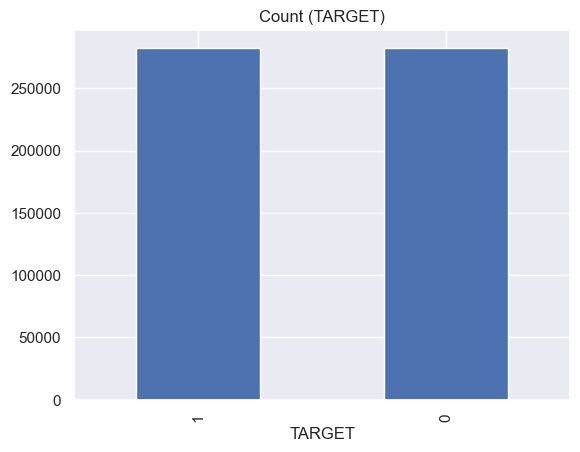

In [25]:
#handling data imbalance (resampling)
# Class count
count_class_0, count_class_1 = df_train.TARGET.value_counts()

# Divide class
df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_1 = df_train[df_train['TARGET'] == 1]

#use random over-sampling so that not much information is lost
df_class_1_up = df_class_1.sample(count_class_0, replace=True)
df_oversampling = pd.concat([df_class_1_up, df_class_0], axis=0)

print('Random over-sampling:')
print(df_oversampling.TARGET.value_counts())

df_oversampling.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [26]:
#data splitting
target = df_oversampling['TARGET']
ft_train = df_oversampling.drop('TARGET', axis=1)

X_train, X_test, y_train, y_test = train_test_split(ft_train, target, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 121) (113075, 121)


In [27]:
# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print('Training data shape: ', X_train.shape)
print('Testing data shape: ', X_test.shape)

Training data shape:  (452297, 121)
Testing data shape:  (113075, 121)


#### Logistic Regression

In [28]:
#Model Building Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [29]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.65


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.53      0.60     56501
           1       0.62      0.78      0.69     56574

    accuracy                           0.65    113075
   macro avg       0.66      0.65      0.65    113075
weighted avg       0.66      0.65      0.65    113075



#### Decision Tree

In [31]:
#Model Building Decision Tree
dectree = DecisionTreeClassifier().fit(X_train,y_train)

In [32]:
y_pred_dt = dectree.predict(X_test)
print('Accuracy of decision tree on test set: {:.2f}'.format(dectree.score(X_test, y_test)))

Accuracy of decision tree on test set: 0.76


In [33]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79     56501
           1       0.87      0.62      0.72     56574

    accuracy                           0.76    113075
   macro avg       0.79      0.76      0.76    113075
weighted avg       0.79      0.76      0.76    113075



#### Random Forest

In [35]:
#Model Building Decision Tree
ranfor = RandomForestClassifier().fit(X_train, y_train)

In [36]:
y_pred_rf = ranfor.predict(X_test)
print('Accuracy of random forest on test set: {:.2f}'.format(ranfor.score(X_test, y_test)))

Accuracy of random forest on test set: 0.95


In [37]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     56501
           1       1.00      0.90      0.94     56574

    accuracy                           0.95    113075
   macro avg       0.95      0.95      0.95    113075
weighted avg       0.95      0.95      0.95    113075



Based on the three building models above, random forest was chosen as the best model for predicting client's repayment abilities, with  95% testing accuracy.

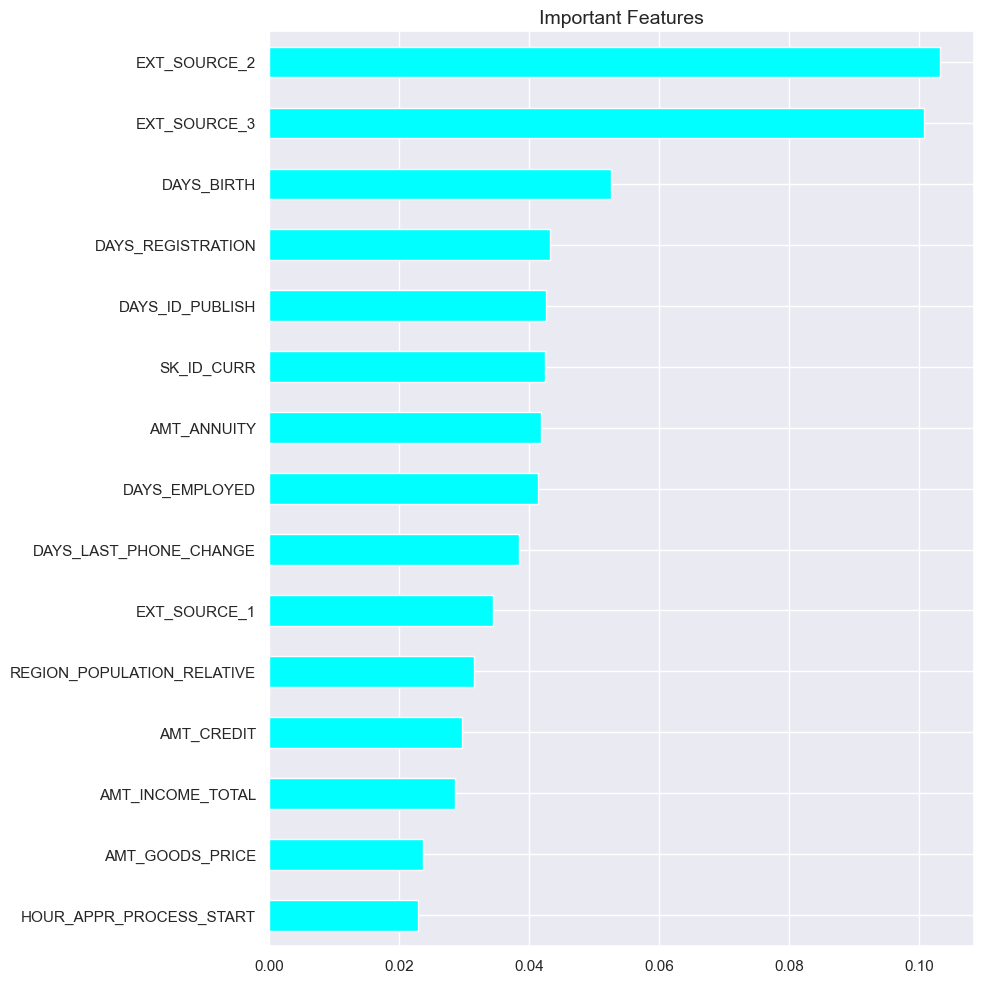

In [38]:
#Important features using random forest
# important features
imp_feat_rf = pd.Series(dectree.feature_importances_, index=ft_train.columns).sort_values(ascending=False)
imp_feat_rf = imp_feat_rf[:15]

plt.style.use('seaborn-v0_8-pastel')
plt.figure(figsize=(10,10))
fig = imp_feat_rf.plot(kind ='barh', color='aqua')
plt.title('Important Features', fontsize=14)
plt.gca().invert_yaxis()
fig.figure.tight_layout()
plt.show()

#### Recommendations

1. Offer financial literacy workshops or counseling for clients with lower education, large families, and irregular income sources.
2. Develop campaigns to generate interest among bussinessman, students, and HR Staff to apply for loans.